In [1]:
import gzip
import logging
import gensim
import numpy as np

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
data_file="./data/reviews_data.txt.gz"

def read_input(input_file):
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 
            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            yield gensim.utils.simple_preprocess (line)

documents = list (read_input (data_file))
logging.info ("Done reading data file")   

2023-08-24 17:13:46,900 : INFO : reading file ./data/reviews_data.txt.gz...this may take a while
2023-08-24 17:13:46,910 : INFO : read 0 reviews
2023-08-24 17:13:48,063 : INFO : read 10000 reviews
2023-08-24 17:13:49,201 : INFO : read 20000 reviews
2023-08-24 17:13:50,468 : INFO : read 30000 reviews
2023-08-24 17:13:51,793 : INFO : read 40000 reviews
2023-08-24 17:13:53,143 : INFO : read 50000 reviews
2023-08-24 17:13:54,465 : INFO : read 60000 reviews
2023-08-24 17:13:55,579 : INFO : read 70000 reviews
2023-08-24 17:13:56,583 : INFO : read 80000 reviews
2023-08-24 17:13:57,639 : INFO : read 90000 reviews
2023-08-24 17:13:58,698 : INFO : read 100000 reviews
2023-08-24 17:13:59,726 : INFO : read 110000 reviews
2023-08-24 17:14:00,781 : INFO : read 120000 reviews
2023-08-24 17:14:02,237 : INFO : read 130000 reviews
2023-08-24 17:14:03,409 : INFO : read 140000 reviews
2023-08-24 17:14:04,470 : INFO : read 150000 reviews
2023-08-24 17:14:05,619 : INFO : read 160000 reviews
2023-08-24 17:14

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(vector_size=100, window=10, min_count=2, workers=14)
model.build_vocab(documents)

2023-08-21 14:41:14,407 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2023-08-21T14:41:14.407373', 'gensim': '4.3.1', 'python': '3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]', 'platform': 'Linux-6.0.12-76060006-generic-x86_64-with-glibc2.35', 'event': 'created'}
2023-08-21 14:41:14,408 : INFO : collecting all words and their counts
2023-08-21 14:41:14,410 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-08-21 14:41:14,576 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2023-08-21 14:41:14,724 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2023-08-21 14:41:14,895 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2023-08-21 14:41:15,059 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2023-08-21 14:41:15,236 : INFO : PROGRESS: at s

In [ ]:
model.train(documents, total_examples=model.corpus_count, epochs=8)

2023-08-21 14:41:37,428 : INFO : Word2Vec lifecycle event {'msg': 'training model with 14 workers on 70537 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10 shrink_windows=True', 'datetime': '2023-08-21T14:41:37.428504', 'gensim': '4.3.1', 'python': '3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]', 'platform': 'Linux-6.0.12-76060006-generic-x86_64-with-glibc2.35', 'event': 'train'}
2023-08-21 14:41:38,443 : INFO : EPOCH 0 - PROGRESS: at 9.75% examples, 3055853 words/s, in_qsize 25, out_qsize 2
2023-08-21 14:41:39,444 : INFO : EPOCH 0 - PROGRESS: at 18.57% examples, 3114704 words/s, in_qsize 26, out_qsize 1
2023-08-21 14:41:40,448 : INFO : EPOCH 0 - PROGRESS: at 27.99% examples, 3115950 words/s, in_qsize 26, out_qsize 2
2023-08-21 14:41:41,452 : INFO : EPOCH 0 - PROGRESS: at 39.08% examples, 3120459 words/s, in_qsize 26, out_qsize 1
2023-08-21 14:41:42,459 : INFO : EPOCH 0 - PROGRESS: at 50.15% examples, 3113311 words/s, in_qsize 26, out_qsize 1
2023-08-2

(242795585, 332154872)

In [ ]:
model.wv.most_similar(positive="dirty")

[('filthy', 0.9059581160545349),
 ('unclean', 0.8379296660423279),
 ('stained', 0.8251102566719055),
 ('grubby', 0.8182087540626526),
 ('dusty', 0.802918016910553),
 ('smelly', 0.7950416803359985),
 ('mouldy', 0.7904006838798523),
 ('soiled', 0.7797787189483643),
 ('unkempt', 0.7614713907241821),
 ('gross', 0.758578360080719)]

In [ ]:
model.wv.most_similar (positive='france')

[('germany', 0.7341746091842651),
 ('canada', 0.7213454842567444),
 ('england', 0.7135050296783447),
 ('mexico', 0.692047119140625),
 ('austria', 0.6900771856307983),
 ('russia', 0.6884550452232361),
 ('spain', 0.6607728004455566),
 ('greece', 0.6528760194778442),
 ('los', 0.6511914134025574),
 ('hawaii', 0.6504008173942566)]

In [ ]:
w1 = ["bed",'sheet','pillow']
# w2 = ['couch']
model.wv.most_similar (positive=w1,topn=10)

[('mattress', 0.8605045676231384),
 ('duvet', 0.8326661586761475),
 ('matress', 0.8307554721832275),
 ('blanket', 0.8296950459480286),
 ('quilt', 0.7914061546325684),
 ('cushion', 0.7879692316055298),
 ('pillows', 0.7450283765792847),
 ('foam', 0.7433111071586609),
 ('pillowcases', 0.7261016368865967),
 ('comforter', 0.7236571907997131)]

In [ ]:
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1, negative=w2, topn=10)

[('blanket', 0.7690041065216064),
 ('mattress', 0.7626453042030334),
 ('duvet', 0.7590292692184448),
 ('matress', 0.7338412404060364),
 ('foam', 0.7280505895614624),
 ('sheets', 0.7232750058174133),
 ('pillowcase', 0.7213153839111328),
 ('quilt', 0.7053332924842834),
 ('pillowcases', 0.6921098828315735),
 ('pillows', 0.6760977506637573)]

In [ ]:
print(model.wv.similarity(w1="dirty",w2="dirty"))
print(model.wv.similarity(w1="dirty",w2="unclean"))
print(model.wv.similarity(w1="dirty",w2="clean"))

1.0
0.8379296
0.28843305


In [ ]:
model.wv.doesnt_match(["cat","dog","france"])

'france'

#### Visualisation


In [ ]:
wordvectors = model.wv
wordvectors.save('./data/w_vectors.kv')

2023-08-21 15:27:39,219 : INFO : KeyedVectors lifecycle event {'fname_or_handle': './data/w_vectors.kv', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-08-21T15:27:39.219790', 'gensim': '4.3.1', 'python': '3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]', 'platform': 'Linux-6.0.12-76060006-generic-x86_64-with-glibc2.35', 'event': 'saving'}
2023-08-21 15:27:39,289 : INFO : saved ./data/w_vectors.kv


In [2]:
from gensim.models import KeyedVectors

wvec = KeyedVectors.load('./data/w_vectors.kv')


In [ ]:
vecs, labels = [], []

for w in wvec.key_to_index:
    vecs.append(wvec[w])
    labels.append(w)

vecs = np.asarray(vecs)

(70537, 100)

In [ ]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=0)
# vectors_tsne = tsne.fit_transform(vecs)

Error in callback <function _draw_all_if_interactive at 0x7f4017d649d0> (for post_execute):


KeyboardInterrupt: 

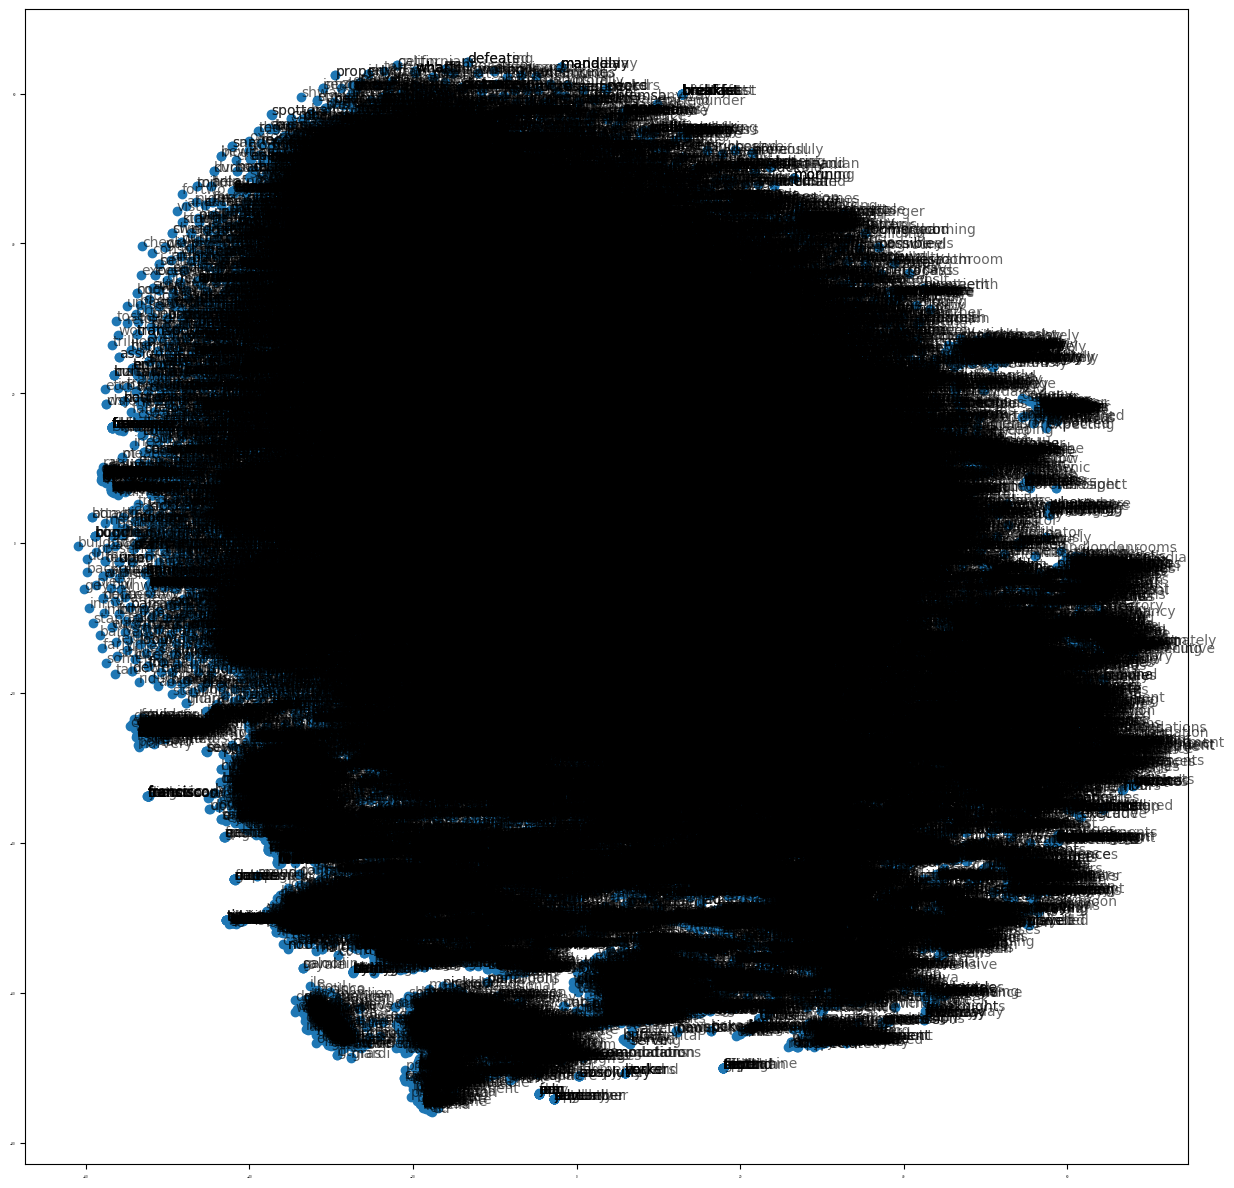

In [ ]:
# import matplotlib.pyplot as plt

# x, y = vectors_tsne[:, 0], vectors_tsne[:, 1]

# plt.figure(figsize=(20, 20))
# plt.scatter(x, y, linewidths=1)
# plt.tick_params(labelsize=1)

# for i, label in enumerate(labels):
#     plt.annotate(label, (x[i], y[i]), alpha=0.6)

In [4]:
import nltk
import string

nltk.download('stopwords')

# get the list of stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

labels = [lb for lb in  wvec.index_to_key if lb not in stopwords and lb not in punctuation]
vecs = [wvec[lb] for lb in labels]

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/divyan-18871/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
projection_data = [(lb, vc) for lb, vc in zip(labels, vecs)]

In [9]:
from utils import create_projection

create_projection(projection_data, path='./tf-meta/reviewsMeta')

2023-08-24 17:32:05.965758: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 17:32:05.967297: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:32:05.995922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-24 17:32:05.996316: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 17:32:06.444680: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co